# Load libraries and dataframe

In [20]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
suppressWarnings(library(RODBC))
library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
require(grDevices)
library(tidyverse)
library(ggthemes)
library(ggridges)
library(ggplot2)
library(viridis)
library(hrbrthemes)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = read.csv("../input/adult-census-income/adult.csv")
str(df)

[1] "adult-census-income"

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 1 5 1 5 5 5 5 8 2 5 ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 12 1 11 12 16 ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 1 6 5 1 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 1 5 1 8 11 9 2 11 11 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 5 5 3 2 5 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 2 1 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.

# Initial exploration of the data: Overview of data

In [21]:
summary(df)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education.num                 marital.status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

# Initial exploration of the data: Part 2

In [22]:
head(df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


# Cleaning data: deleting rows with question marks

In [23]:
df = df[df$age != '?', ]
df = df[df$workclass != '?', ]
df = df[df$fnlwgt != '?', ]
df = df[df$education != '?', ]
df = df[df$education.num != '?', ]
df = df[df$marital.status != '?', ]
df = df[df$occupation != '?', ]
df = df[df$relationship != '?', ]
df = df[df$race != '?', ]
df = df[df$sex != '?', ]
df = df[df$capital.gain != '?', ]
df = df[df$capital.loss != '?', ]
df = df[df$hours.per.week != '?', ]
df = df[df$native.country != '?', ]
df = df[df$income != '?', ]

# Cleaning data: Making a new column that is the difference between capital.gain and capital.loss

In [24]:
df$capital.agg <- (df$capital.gain - df$capital.loss)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.agg
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,-4356
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,-3900
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,-3900
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,-3770
7,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,-3770
8,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,-3683
9,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K,-3683
11,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K,-3004
12,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K,-2824


# Cleaning the data: Making a subset that only includes people born outside of US

In [25]:
foreignborn = df[df$native.country != 'United-States', ]
foreignborn


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital.agg
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
27,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,<=50K,-2603
28,49,Private,122066,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,Greece,<=50K,-2603
48,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,<=50K,-2457
64,51,Self-emp-not-inc,160724,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,China,>50K,-2415
68,55,Self-emp-inc,124137,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,35,Greece,>50K,-2415
83,31,Private,279015,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,70,Taiwan,>50K,-2415
91,39,Private,198654,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,67,India,>50K,-2415
96,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines,>50K,-2415
157,42,Private,191765,HS-grad,9,Never-married,Adm-clerical,Other-relative,Black,Female,0,2339,40,Trinadad&Tobago,<=50K,-2339


# Summary: Description statistics of entire dataframe

In [26]:
"Age"
summary(df$age)

"Edu"
summary(df$education.num)

"Hrs/wk"
summary(df$hours.per.week)

"Aggregated Capital"
summary(df$capital.agg)


[1] "Age"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.44   47.00   90.00 

[1] "Edu"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.12   13.00   16.00 

[1] "Hrs/wk"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.93   45.00   99.00 

[1] "Aggregated Capital"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4356       0       0    1004       0   99999 

# Summary: Description statistics of immigrants dataframe

In [27]:
"Age"
summary(foreignborn$age)

"Edu"
summary(foreignborn$education.num)

"Hrs/wk"
summary(foreignborn$hours.per.week)

"Aggregated Capital"
summary(foreignborn$capital.agg)


[1] "Age"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   36.00   37.75   46.00   90.00 

[1] "Edu"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   7.000   9.000   9.078  13.000  16.000 

[1] "Hrs/wk"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.52   40.00   99.00 

[1] "Aggregated Capital"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2603.0     0.0     0.0   728.5     0.0 99999.0 

# Summary: What are the differences between the descriptive statistics of general df and immigrants df?

In [28]:
"Age"
summary(df$age) - summary(foreignborn$age)

"Edu"
summary(df$education.num) - summary(foreignborn$education.num)

"Hrs/wk"
summary(df$hours.per.week) - summary(foreignborn$hours.per.week)

"Aggregated Capital"
summary(df$capital.agg) - summary(foreignborn$capital.agg)



[1] "Age"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   0.687   1.000   0.000 

[1] "Edu"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   1.000   1.043   0.000   0.000 

[1] "Hrs/wk"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4113  5.0000  0.0000 

[1] "Aggregated Capital"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1753.0     0.0     0.0   275.2     0.0     0.0 

# Visualization: Proportion of immigrants from different countries with income greater than 50k

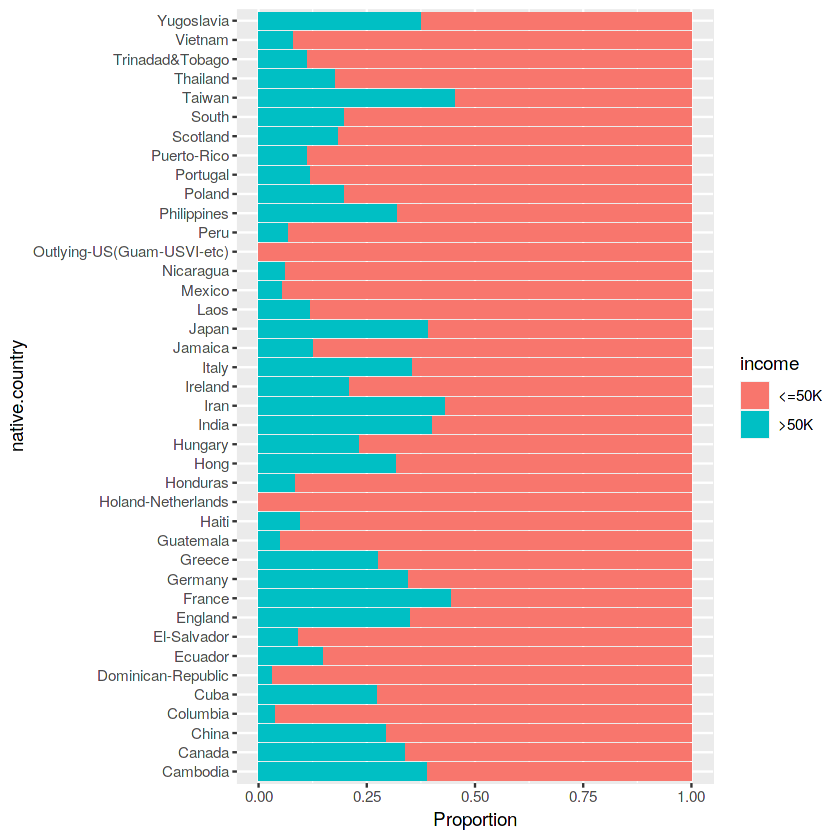

In [29]:
ggplot(foreignborn, 
       aes(x = native.country, 
           fill = income)) + 
   geom_bar(position = "fill") +
coord_flip()+
labs(y = "Proportion")

# Visualization: Workclasses immigrants from different countries go into

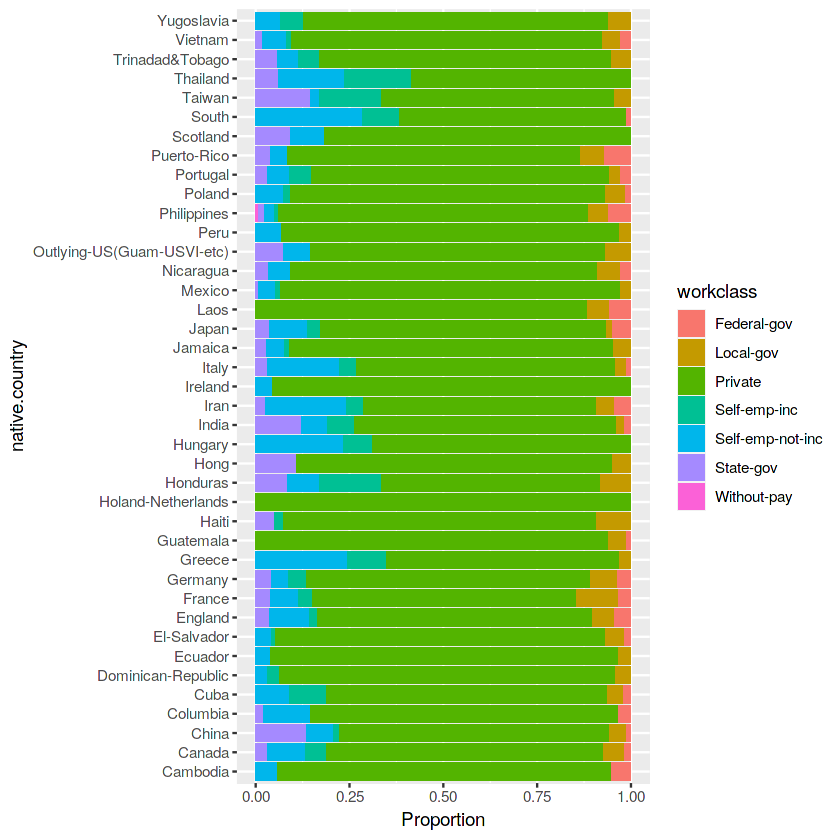

In [30]:
ggplot(foreignborn, 
       aes(x = native.country, 
           fill = workclass)) + 
   geom_bar(position = "fill") +
coord_flip()+
labs(y = "Proportion")

# Visualization: Workclasses and income for immigrants

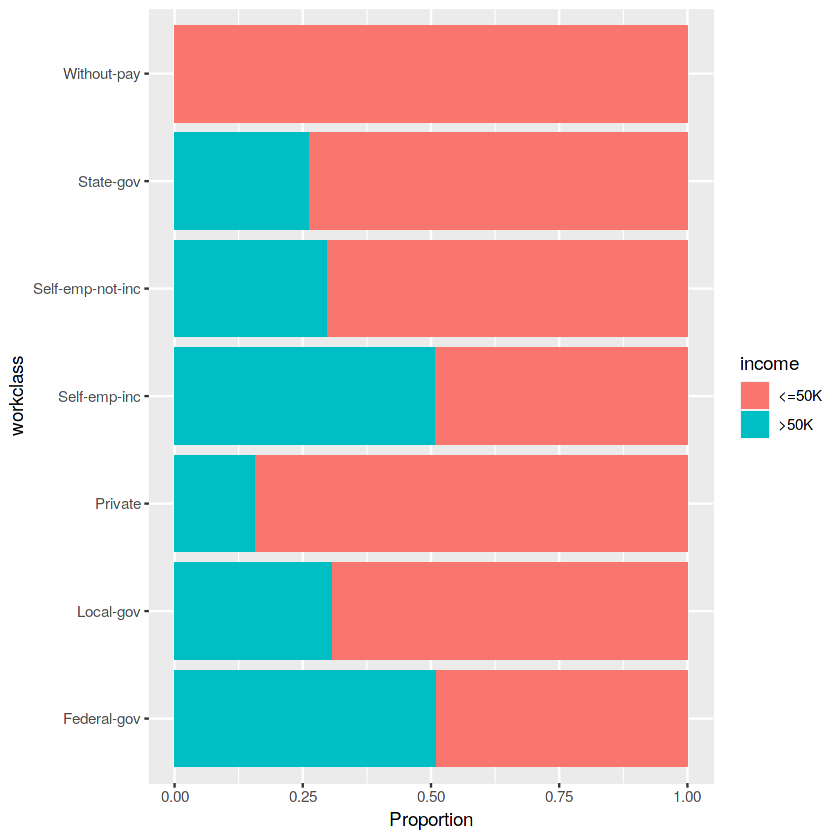

In [31]:
ggplot(foreignborn, 
       aes(x = workclass, 
           fill = income)) + 
   geom_bar(position = "fill") +
coord_flip()+
labs(y = "Proportion")

# Visualization: Distrubution of education level of immigrants from different countries

Picking joint bandwidth of 0.969



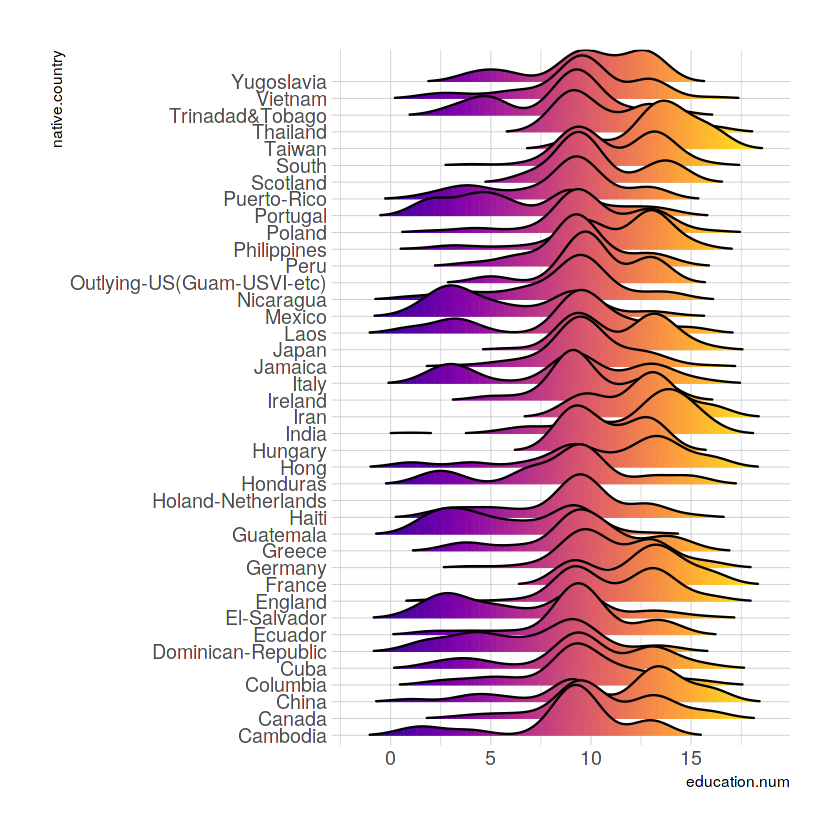

In [32]:
ggplot(foreignborn, aes(x = education.num, y = native.country, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  theme_ipsum() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.6, "lines"),
      strip.text.x = element_text(size = 30)
    )

# Visualization: Distribution of education level for people of different marital status

Picking joint bandwidth of 0.368



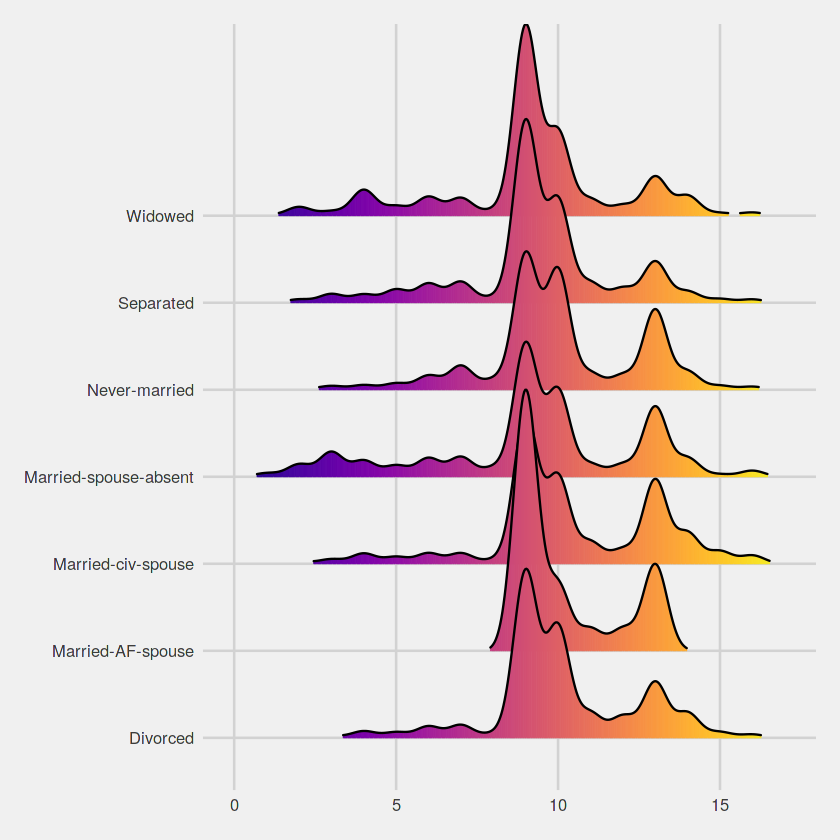

In [33]:
ggplot(df, aes(x = education.num, y = marital.status, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  theme_fivethirtyeight() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.6, "lines"),
      strip.text.x = element_text(size = 30)
    )

# Visualization: Distribution of education level for immigrants of different marital status

Picking joint bandwidth of 1.02



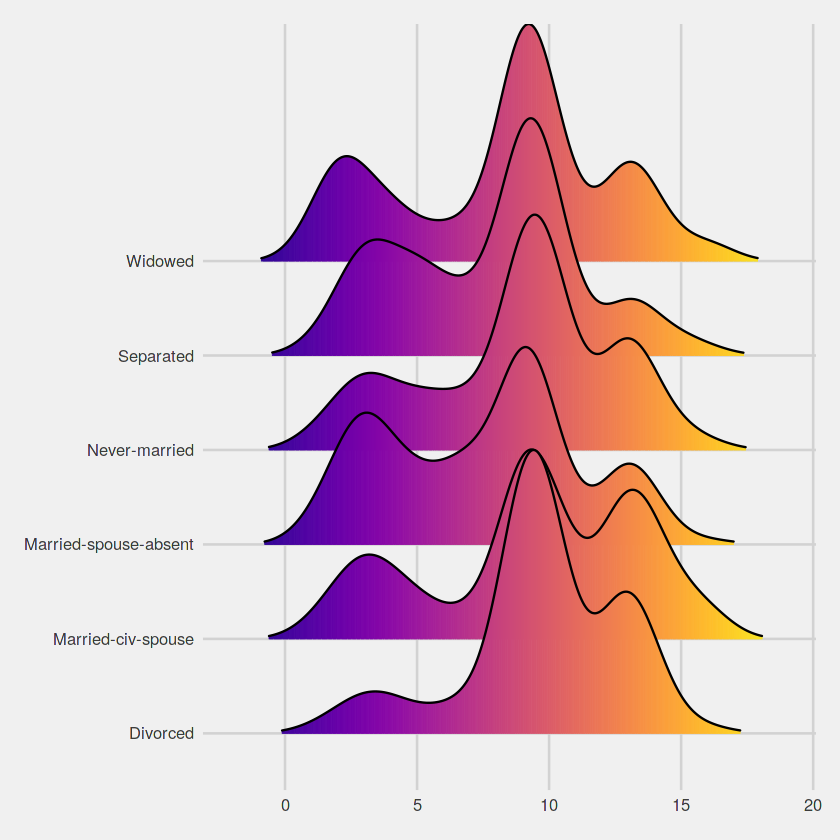

In [34]:
ggplot(foreignborn, aes(x = education.num, y = marital.status, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  theme_fivethirtyeight() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.6, "lines"),
      strip.text.x = element_text(size = 30)
    )

# Visualization: How many people in different relationships have income > 50k?

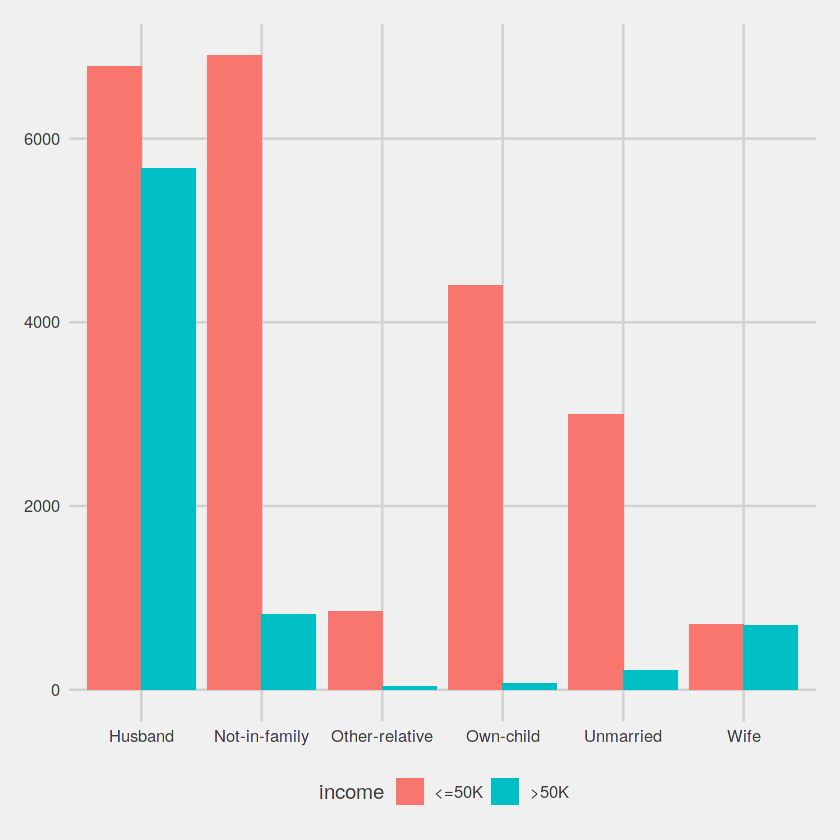

In [35]:
ggplot(df, aes(relationship, ..count..)) + geom_bar(aes(fill = income), position = "dodge") + theme_fivethirtyeight()


# Visualization: Distribution of aggregate capital for immigrants of different countries

Picking joint bandwidth of 1370



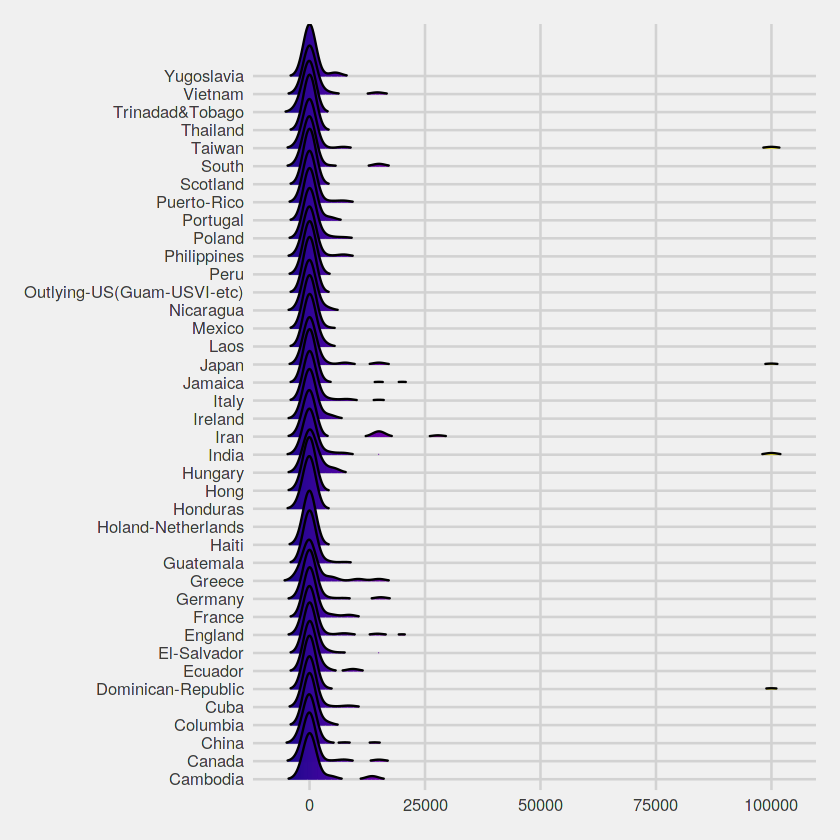

In [36]:
ggplot(foreignborn, aes(x = capital.agg, y = native.country, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  theme_fivethirtyeight() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.6, "lines"),
      strip.text.x = element_text(size = 30)
    )

# Visualization: Distribution of aggregate capital for immigrants of different census defined race

Picking joint bandwidth of 1520



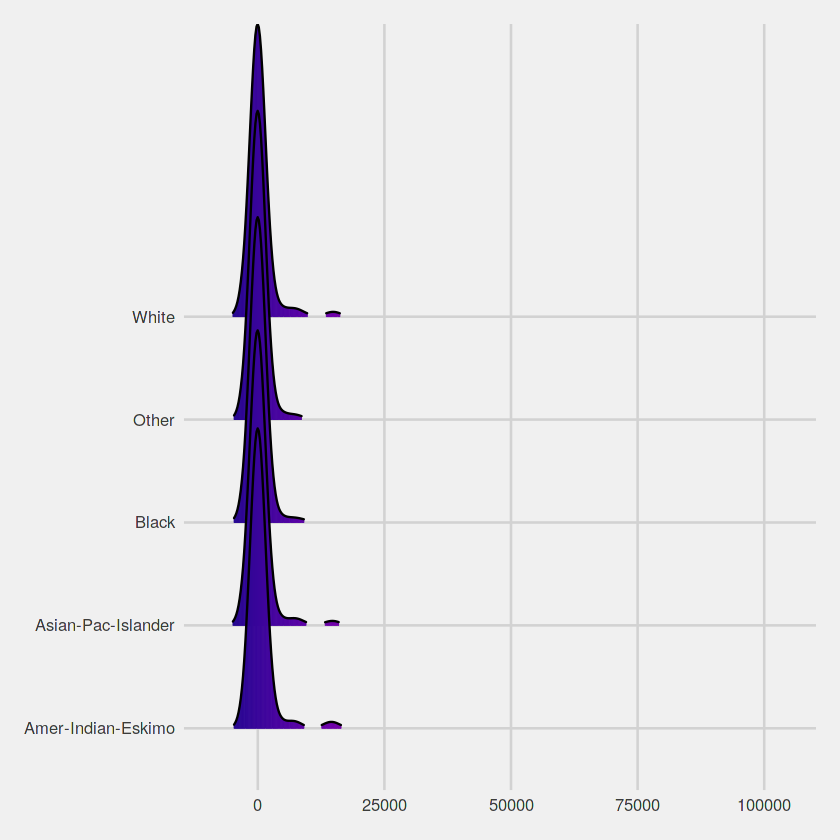

In [37]:
ggplot(df, aes(x = capital.agg, y = race, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  theme_fivethirtyeight() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.6, "lines"),
      strip.text.x = element_text(size = 30)
    )